Olá, Jules

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Há erro de execução que impede correção. </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>




<div class="alert alert-block alert-success">
<b> Comentário Geral do revisor: </b> <a class="tocSkip"></a>

Tudo certo agora. Parabéns pelo empenho. Desejo sucesso na jornada.

</div>

# Sprint 9

## Parte 1. Priorizando Hipóteses

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# carrega os dados
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
# calcula ICE e RICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']


In [4]:
# classificação
ice_sorted = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
rice_sorted = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

In [5]:
# comparação
hypotheses['ICE_rank'] = hypotheses['ICE'].rank(ascending=False)
hypotheses['RICE_rank'] = hypotheses['RICE'].rank(ascending=False)
comparison = hypotheses[['Hypothesis', 'ICE_rank', 'RICE_rank']].copy()
comparison['Difference'] = comparison['ICE_rank'] - comparison['RICE_rank']

In [6]:
print("\nClassificação por ICE:")
print(ice_sorted)

print("\nClassificação por RICE:")
print(rice_sorted)

print("\nComparação de rankings ICE vs RICE:")
print(comparison.sort_values(by='Difference', key=abs, ascending=False))


Classificação por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

Classificação por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a

- A hipótese 8 caiu 4 posições, do 1º lugar no ICE para o 5º no RICE. O motivo é seu Alcance (Reach) extremamente baixo (valor 1). Embora a ideia de uma promoção de aniversário seja boa em teoria, ela afeta um número muito pequeno de usuários, tornando seu impacto geral no negócio relativamente baixo.
- A Hipótese 7 subiu do 3º para o 1º lugar. Isso se deve ao seu Alcance máximo (Reach = 10). A mudança afetaria todos os visitantes das páginas principais.
- A Hipótese 2 também subiu significativamente (de 5º para 2º) devido ao seu alto Alcance (Reach = 8). Muitos usuários interagem com recomendações, o que aumenta seu valor estratégico.

## Parte 2. Análise de teste A/B

In [7]:


# encontrando usuários que estão em ambos os grupos
visitors_in_A = orders[orders['group'] == 'A']['visitorId']
visitors_in_B = orders[orders['group'] == 'B']['visitorId']
overlapping_visitors = np.intersect1d(visitors_in_A, visitors_in_B)

# removendo esses usuários do DataFrame de pedidos
orders = orders[~orders['visitorId'].isin(overlapping_visitors)]

print(f"{len(overlapping_visitors)} usuários foram encontrados em ambos os grupos e removidos.")


58 usuários foram encontrados em ambos os grupos e removidos.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

erro de execução
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>

### Tarefa 1

In [8]:
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# converte as colunas de data para o formato datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# cria uma matriz de pares de grupo únicos
datesGroups = orders[['date', 'group']].drop_duplicates()

# caçcula os dados cumulativos de pedidos e receita
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# unindo os dados de visitas aos dados cumulativos
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]

# separando os dados de receita acumulada por grupo
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']


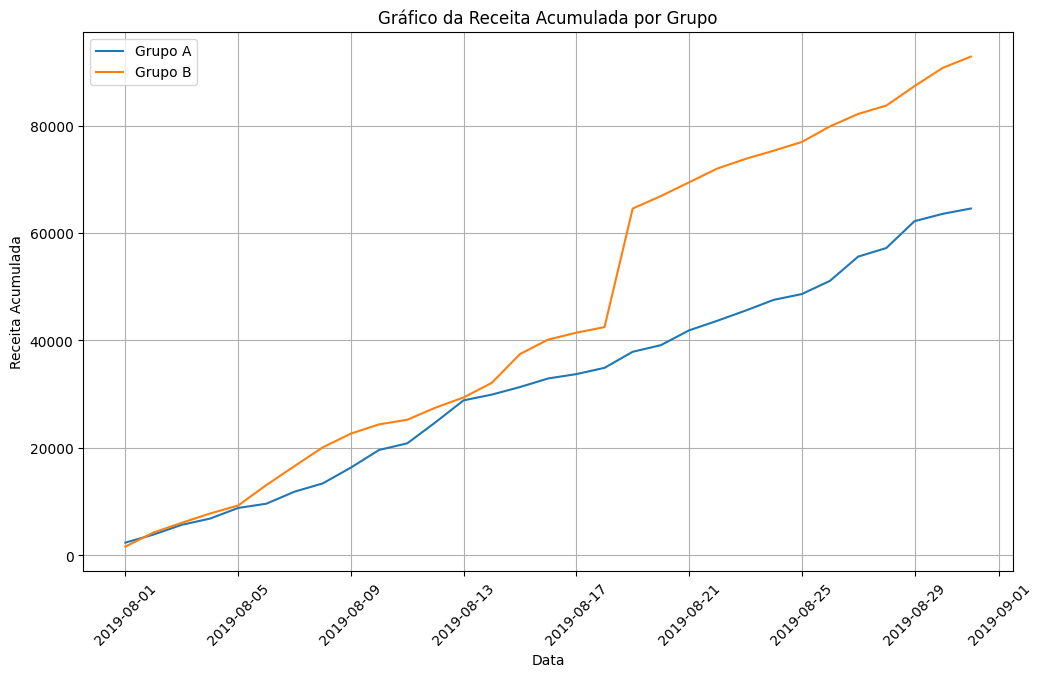

In [9]:
# gráfico de receita acumulada
plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Grupo A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Grupo B')


plt.title('Gráfico da Receita Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotacionar as datas para melhor legibilidade
plt.show()

A receita aumenta de forma constante para ambos os grupos ao longo do teste. O Grupo B mostra uma receita consistentemente maior que a do Grupo A durante a maior parte do teste.

## Tarefa 2

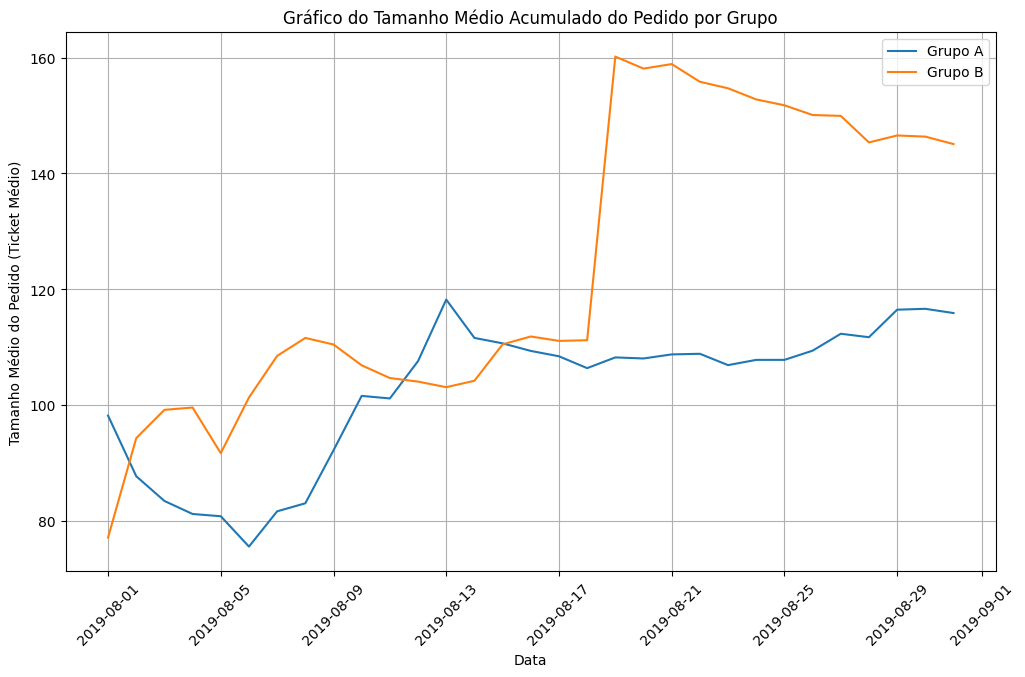

In [10]:
# gráfico do tamanho médio do pedido acumulado
plt.figure(figsize=(12, 7))

# cáculo da receita acumulada / pedidos acumulados
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='Grupo A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='Grupo B')


plt.title('Gráfico do Tamanho Médio Acumulado do Pedido por Grupo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio do Pedido (Ticket Médio)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

O tamanho médio do pedido do Grupo B dispara no mesmo ponto em que o gráfico de receita mostrou um pico, reforçando a conjectura de que ocorreram pedidos de valor muito alto. Após o pico, o valor médio do Grupo B começa a diminuir, indicando que o pico foi um evento pontual.

### Tarefa 3

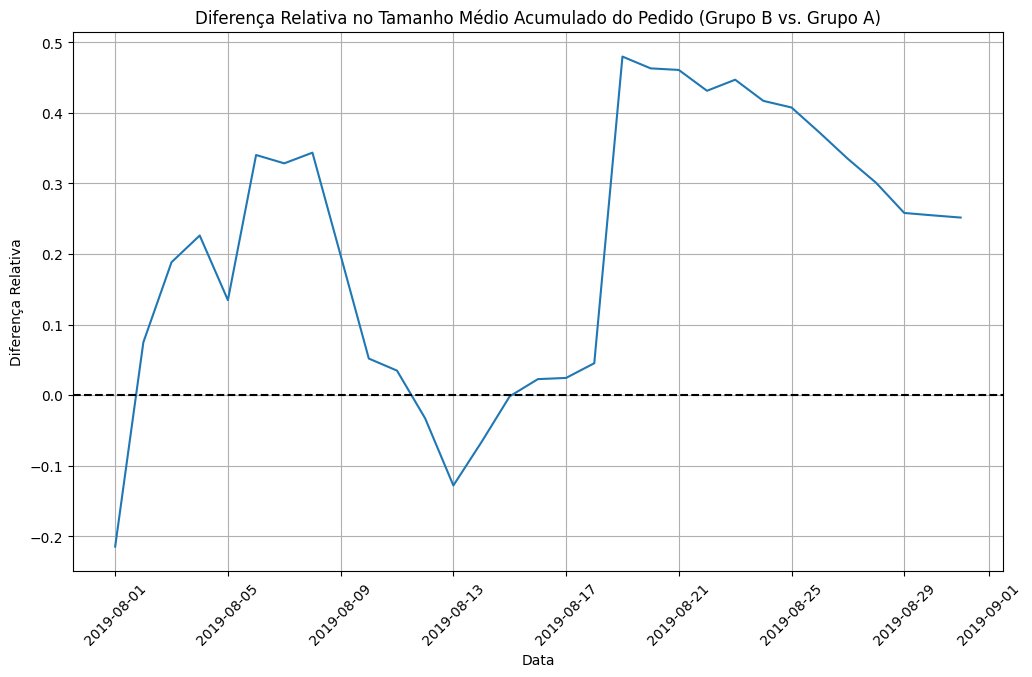

In [11]:
# unindo os dados de receita e pedidos dos grupos A e B em uma única tabela
mergedCumulativeRevenue = cumulativeRevenueA[['date', 'revenue', 'orders']].merge(
    cumulativeRevenueB[['date', 'revenue', 'orders']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

#  gráfico da diferença relativa
plt.figure(figsize=(12, 7))

# cálculando da diferença relativa do tamanho médio do pedido
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1
)

# adicionando uma linha de referência em 0 
plt.axhline(y=0, color='black', linestyle='--')


plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs. Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

O gráfico mostra flutuações extremas em vários pontos. Isso indica que a diferença entre os grupos não se estabilizou. Com base neste gráfico, é impossível tirar uma conclusão definitiva sobre qual grupo tem um tamanho médio de pedido superior de forma consistente. A métrica é muito instável.


### Tarefa 4

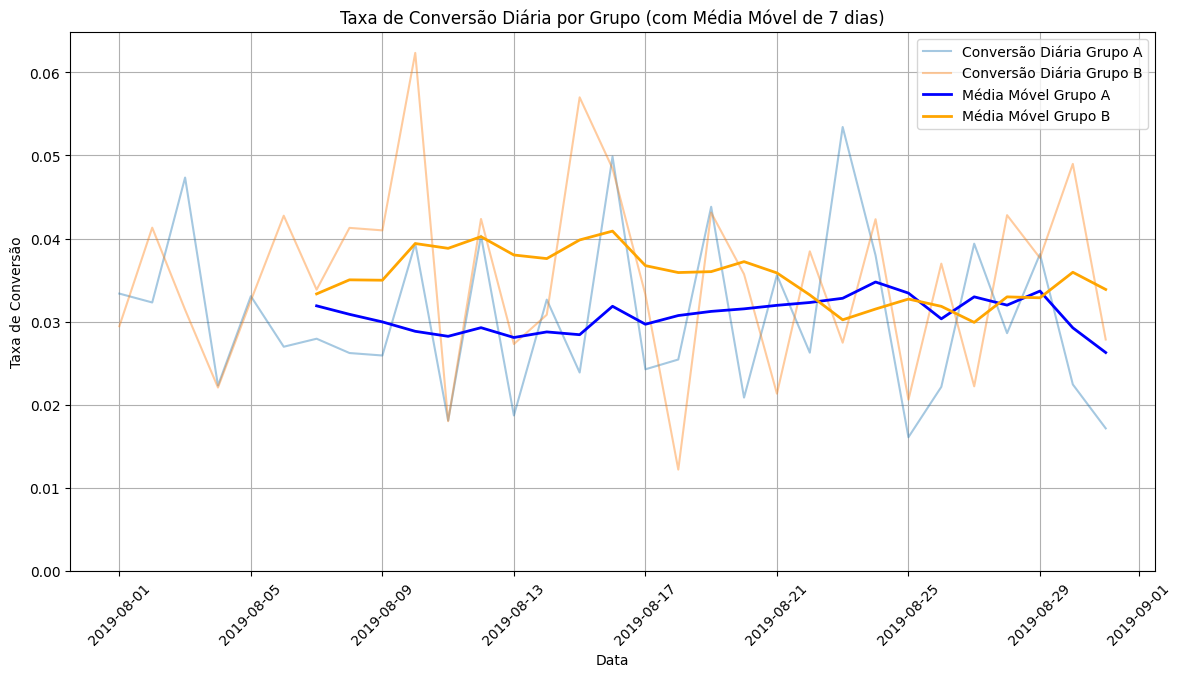

In [12]:
# calculando o número de pedidos por dia para cada grupo
daily_orders = (
    orders.groupby(['date', 'group'], as_index=False)
    .agg(orders_count=('transactionId', 'nunique'))
)

# renomeando a coluna de visitas para clareza
daily_visits = visits.rename(columns={'visits': 'visits_count'})

# unindo os dados diários de pedidos e visitas
daily_data = pd.merge(daily_visits, daily_orders, on=['date', 'group'], how='outer')

# preenchendo dias sem pedidos com 0 e calcular a conversão
daily_data['orders_count'] = daily_data['orders_count'].fillna(0)
daily_data['conversion'] = daily_data['orders_count'] / daily_data['visits_count']

# separando os dados por grupo para a plotagem
daily_conversion_A = daily_data[daily_data['group'] == 'A']
daily_conversion_B = daily_data[daily_data['group'] == 'B']

# taxas de conversão diárias e a média móvel
plt.figure(figsize=(14, 7))

# linhas da conversão diária 
plt.plot(daily_conversion_A['date'], daily_conversion_A['conversion'], label='Conversão Diária Grupo A', alpha=0.4)
plt.plot(daily_conversion_B['date'], daily_conversion_B['conversion'], label='Conversão Diária Grupo B', alpha=0.4)

# linhas da média móvel de 7 dias 
plt.plot(daily_conversion_A['date'], daily_conversion_A['conversion'].rolling(7).mean(), label='Média Móvel Grupo A', color='blue', linewidth=2)
plt.plot(daily_conversion_B['date'], daily_conversion_B['conversion'].rolling(7).mean(), label='Média Móvel Grupo B', color='orange', linewidth=2)


plt.title('Taxa de Conversão Diária por Grupo (com Média Móvel de 7 dias)')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0) 
plt.show()

As conversões diárias de ambos os grupos flutuam significativamente, o que torna a comparação direta das linhas diárias (mais claras) difícil.

A tendência sugere que a alteração testada no Grupo B resultou em uma melhora pequena, mas consistente, na taxa de conversão. Diferente da métrica de ticket médio, a conversão parece ser um indicador mais estável e confiável neste teste.

### Tarefa 5

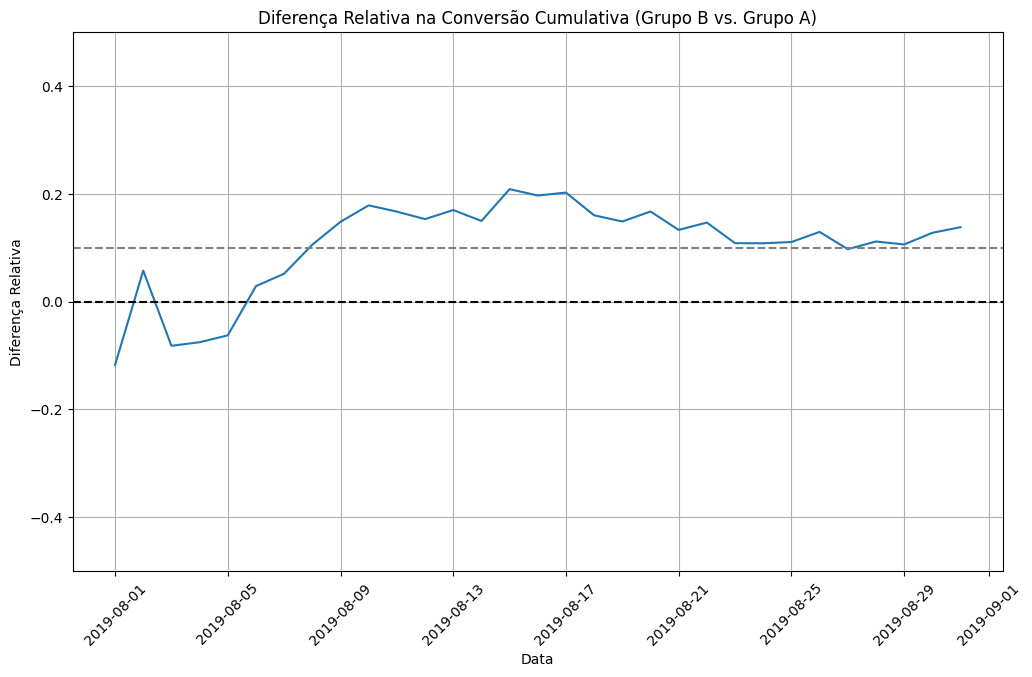

In [13]:
# calculando a conversão cumulativa

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visits']

# os dados por grupo
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# unindo os dados para calcular a diferença
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
) 

# gráfico da diferença relativa
plt.figure(figsize=(12, 7))

plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1
)


plt.axhline(y=0, color='black', linestyle='--')

plt.axhline(y=0.1, color='grey', linestyle='--')


plt.title('Diferença Relativa na Conversão Cumulativa (Grupo B vs. Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.grid(True)
plt.xticks(rotation=45)

plt.ylim(-0.5, 0.5)
plt.show()

No início do teste, a conversão do Grupo B era pior que a do Grupo A, e o gráfico mostra bastante volatilidade.

A estabilização do gráfico acima de zero é um sinal muito forte de que a alteração testada no Grupo B teve um impacto positivo e consistente na taxa de conversão.  fato de o gráfico ter se estabilizado sugere que o teste provavelmente já coletou dados suficientes para esta métrica. A evidência visual aponta para uma vitória do Grupo B em termos de conversão.

### Tarefa 6

In [14]:
# calcula o número de pedidos por cada usuário único
orders_by_user = (
    orders.groupby('visitorId', as_index=False)
    .agg(orders_count=('transactionId', 'nunique'))
)

print("Número de pedidos por usuário (primeiras 5 linhas):")
print(orders_by_user.head())

# calcula os percentis 95 e 99
percentiles = np.percentile(orders_by_user['orders_count'], [95, 99])

# imprime os resultados
print(f"\nO 95º percentil para o número de pedidos por usuário é: {int(percentiles[0])}")
print(f"O 99º percentil para o número de pedidos por usuário é: {int(percentiles[1])}")

Número de pedidos por usuário (primeiras 5 linhas):
   visitorId  orders_count
0    5114589             1
1    6958315             1
2    8300375             2
3   11685486             1
4   39475350             1

O 95º percentil para o número de pedidos por usuário é: 2
O 99º percentil para o número de pedidos por usuário é: 4


95º Percentil = 2 pedidos: Isso significa que 95% de todos os usuários fizeram 2 pedidos ou menos durante o período do teste. Apenas 5% dos usuários fizeram mais de 2 pedidos.

99º Percentil = 4 pedidos: Isso significa que 99% de todos os usuários fizeram 4 pedidos ou menos. Apenas 1% de uma base de milhares de usuários fez mais de 4 pedidos.

### Tarefa 7

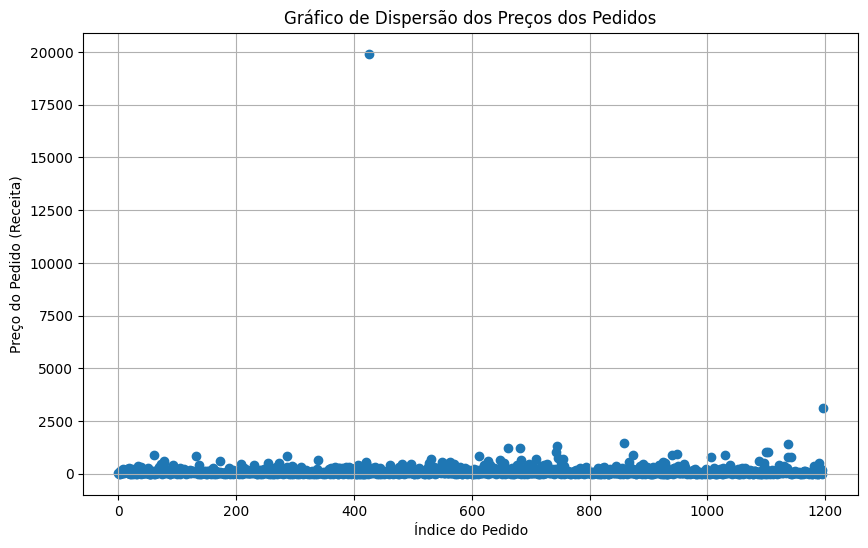

In [15]:
# cria uma série para o eixo X, que representa cada pedido individualmente
x_values = pd.Series(range(0, len(orders['revenue'])))

# gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'])


plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.xlabel('Índice do Pedido')
plt.ylabel('Preço do Pedido (Receita)')
plt.grid(True)
plt.show()

A grande maioria dos pontos no gráfico está concentrada na parte inferior, indicando que a maior parte dos pedidos tem um valor baixo. Existem alguns pontos que estão muito acima da concentração principal. Estes são os pedidos com preços excepcionalmente altos. 

Este gráfico confirma visualmente e de forma inequívoca a presença de outliers nos preços dos pedidos. São esses poucos pedidos caros que distorceram os gráficos de receita acumulada

### Tarefa 8

In [16]:
# calcula os percentis 95 e 99 para os preços dos pedidos
revenue_percentiles = np.percentile(orders['revenue'], [95, 99])

# imprime os resultados
print(f"O 95º percentil para os preços dos pedidos é: ${revenue_percentiles[0]:.2f}")
print(f"O 99º percentil para os preços dos pedidos é: ${revenue_percentiles[1]:.2f}")

O 95º percentil para os preços dos pedidos é: $435.54
O 99º percentil para os preços dos pedidos é: $900.90


95º Percentil: O valor do 95º percentil nos diz que 95% de todos os pedidos tiveram um valor igual ou inferior a este. Apenas 5% dos pedidos foram mais caros.

99º Percentil: O valor do 99º percentil indica que 99% dos pedidos custaram menos que esse valor. Apenas 1% de todos os pedidos foram mais caros, e é neste pequeno grupo que se encontram os valores extremos que vimos nos gráficos.

### Tarefa 9

In [17]:
# calcula o número total de pedidos por grupo
orders_by_group = orders.groupby('group').agg(orders_count=('transactionId', 'nunique'))
orders_A_count = orders_by_group.loc['A', 'orders_count']
orders_B_count = orders_by_group.loc['B', 'orders_count']

# calcula o número total de visitas por grupo
visits_by_group = visits.groupby('group').agg(visits_count=('visits', 'sum'))
visits_A_count = visits_by_group.loc['A', 'visits_count']
visits_B_count = visits_by_group.loc['B', 'visits_count']

# imprime os valores para verificação
print(f"Grupo A: {orders_A_count} pedidos em {visits_A_count} visitas")
print(f"Grupo B: {orders_B_count} pedidos em {visits_B_count} visitas")

# calcula as taxas de conversão para referência
conversion_A = orders_A_count / visits_A_count
conversion_B = orders_B_count / visits_B_count
print(f"Taxa de Conversão Grupo A: {conversion_A:.3%}")
print(f"Taxa de Conversão Grupo B: {conversion_B:.3%}")

Grupo A: 557 pedidos em 18736 visitas
Grupo B: 640 pedidos em 18916 visitas
Taxa de Conversão Grupo A: 2.973%
Taxa de Conversão Grupo B: 3.383%


In [18]:
from scipy import stats as st


# função para realizar o teste Z e calcular o p-value
def check_hypothesis(successes1, trials1, successes2, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'P-value: {p_value:.4f}')
    
    if p_value < alpha:
        print("Rejeitamos a hipótese nula: existe uma diferença significativa entre os grupos.")
    else:
        print("Não podemos rejeitar a hipótese nula: não há evidência de diferença significativa.")

# executa o teste com nossos dados
check_hypothesis(orders_A_count, visits_A_count, orders_B_count, visits_B_count)

P-value: 0.0232
Rejeitamos a hipótese nula: existe uma diferença significativa entre os grupos.


O p-value obtido (0.0232) é menor que o nosso nível de significância padrão de 0.05.  Podemos concluir que existe uma diferença estatisticamente significativa na conversão entre os grupos A e B. Olhando para os dados, o Grupo B apresenta uma taxa de conversão superior à do Grupo A.

### Tarefa 10

In [19]:
from scipy import stats as st


revenue_A = orders[orders['group'] == 'A']['revenue']
revenue_B = orders[orders['group'] == 'B']['revenue']

# teste de Mann-Whitney U
p_value = st.mannwhitneyu(revenue_A, revenue_B)[1]

#  diferença relativa na mediana
median_A = revenue_A.median()
median_B = revenue_B.median()
relative_difference_median = (median_B / median_A) - 1

# resultados
print(f'P-value: {p_value:.3f}')
print(f'Diferença relativa na mediana (B vs. A): {relative_difference_median:.2%}')

#  p-value
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a diferença no tamanho médio do pedido é estatisticamente significativa.")
else:
    print("Não podemos rejeitar a hipótese nula: não há diferença estatisticamente significativa.")

P-value: 0.692
Diferença relativa na mediana (B vs. A): 0.50%
Não podemos rejeitar a hipótese nula: não há diferença estatisticamente significativa.


Um p-value de 0.692 é muito alto, muito acima do nosso limite de 0.05. Este teste confirma que a métrica de "tamanho médio do pedido" nos dados brutos é instável e enganosa. A média é puxada para cima pelos outliers, mas a mediana (e a distribuição geral) permanece a mesma.

### Tarefa 11

In [20]:
# define os limites de anomalia
revenue_percentile_95 = np.percentile(orders['revenue'], 95)

#  95º percentil do número de pedidos por usuário
orders_per_user_percentile_95 = 2 

# identificando os usuários anômalos 
orders_by_user = orders.groupby('visitorId', as_index=False).agg(orders_count=('transactionId', 'nunique'))
abnormal_users = orders_by_user[orders_by_user['orders_count'] > orders_per_user_percentile_95]['visitorId']

#  DataFrame filtrado

orders_filtered = orders[
    ~orders['visitorId'].isin(abnormal_users) &
    (orders['revenue'] <= revenue_percentile_95)
]

print(f"Número de pedidos original: {len(orders)}")
print(f"Número de pedidos filtrado: {len(orders_filtered)}")
print(f"Pedidos removidos: {len(orders) - len(orders_filtered)}")

Número de pedidos original: 1197
Número de pedidos filtrado: 1011
Pedidos removidos: 186


In [21]:

# novo número de pedidos por grupo com os dados filtrados
orders_filtered_by_group = orders_filtered.groupby('group').agg(orders_count=('transactionId', 'nunique'))
orders_A_filtered_count = orders_filtered_by_group.loc['A', 'orders_count']
orders_B_filtered_count = orders_filtered_by_group.loc['B', 'orders_count']

#  número de visitas permanece o mesmo
visits_by_group = visits.groupby('group').agg(visits_count=('visits', 'sum'))
visits_A_count = visits_by_group.loc['A', 'visits_count']
visits_B_count = visits_by_group.loc['B', 'visits_count']

# novos valores
print(f"\nDados Filtrados:")
print(f"Grupo A: {orders_A_filtered_count} pedidos em {visits_A_count} visitas")
print(f"Grupo B: {orders_B_filtered_count} pedidos em {visits_B_count} visitas")

# novas taxas de conversão
conversion_A_filtered = orders_A_filtered_count / visits_A_count
conversion_B_filtered = orders_B_filtered_count / visits_B_count
print(f"Nova Taxa de Conversão Grupo A: {conversion_A_filtered:.3%}")
print(f"Nova Taxa de Conversão Grupo B: {conversion_B_filtered:.3%}")

# função para realizar o teste Z e calcular o p-value
def check_hypothesis(successes1, trials1, successes2, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'P-value: {p_value:.4f}')
    
    if p_value < alpha:
        print("Rejeitamos a hipótese nula: existe uma diferença significativa entre os grupos.")
    else:
        print("Não podemos rejeitar a hipótese nula: não há evidência de diferença significativa.")

# Executar o teste
print("Resultado do teste de conversão com dados filtrados:")
check_hypothesis(orders_A_filtered_count, visits_A_count, orders_B_filtered_count, visits_B_count)

# Calcular a melhoria relativa para a conclusão
conversion_A_filtered = orders_A_filtered_count / visits_A_count
conversion_B_filtered = orders_B_filtered_count / visits_B_count
relative_improvement = (conversion_B_filtered / conversion_A_filtered) - 1
print(f"Melhora relativa da conversão do Grupo B sobre o Grupo A: {relative_improvement:.2%}")



Dados Filtrados:
Grupo A: 463 pedidos em 18736 visitas
Grupo B: 548 pedidos em 18916 visitas
Nova Taxa de Conversão Grupo A: 2.471%
Nova Taxa de Conversão Grupo B: 2.897%
Resultado do teste de conversão com dados filtrados:
P-value: 0.0106
Rejeitamos a hipótese nula: existe uma diferença significativa entre os grupos.
Melhora relativa da conversão do Grupo B sobre o Grupo A: 17.23%


Este é o resultado mais importante do teste até agora. Ele confirma que a superioridade do Grupo B na conversão não foi um acaso ou um efeito causado por um pequeno grupo de usuários anômalos. A mudança testada teve um efeito positivo e genuíno no comportamento da maioria dos usuários.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa utilizar teste estatístico para avaliar se há significância na diferença
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>

### Tarefa 12

In [22]:

from scipy import stats as st

from scipy import stats as st


# amostras de receita com os dados filtrados
revenue_A_filtered = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_B_filtered = orders_filtered[orders_filtered['group'] == 'B']['revenue']

#  teste e calcular o p-value 
p_value_revenue = st.mannwhitneyu(revenue_A_filtered, revenue_B_filtered)[1]

# diferença relativa na mediana dos dados filtrados
median_A_filtered = revenue_A_filtered.median()
median_B_filtered = revenue_B_filtered.median()
relative_diff_median_filtered = (median_B_filtered / median_A_filtered) - 1

# resultados
print(f'P-value: {p_value_revenue:.3f}')
print(f'Diferença relativa na mediana (dados filtrados): {relative_diff_median_filtered:.2%}')

# p-value
alpha = 0.05
if p_value_revenue < alpha:
    print("Rejeitamos a hipótese nula: a diferença no tamanho médio do pedido é estatisticamente significativa.")
else:
    print("Não podemos rejeitar a hipótese nula: não há diferença estatisticamente significativa.")



P-value: 0.730
Diferença relativa na mediana (dados filtrados): -0.77%
Não podemos rejeitar a hipótese nula: não há diferença estatisticamente significativa.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

não consegui localizar de onde vem a variável p_value_revenue
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>

Um p-value de 0.730 é extremamente alto, o que confirma com grande certeza que não há diferença estatística entre os grupos.  A diferença de -0.77% na mediana é praticamente zero. Isso nos diz que, removendo os outliers, o valor do pedido "típico" é quase idêntico em ambos os grupos.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

Faltou apenas avaliar o tamanho médio do pedido exlcuindo os usuários anômalos.
</div>

### Tarefa 13

1. Pare o teste, considere um dos grupos o líder.


As métricas se estabilizaram e os testes estatísticos forneceram resultados claros e consistentes. Prolongar o teste não traria novos insights e apenas adiaria a implementação de uma melhoria comprovada.O teste tinha como objetivo encontrar maneiras de aumentar a receita. O Grupo B atingiu esse objetivo de forma clara: ele converte visitantes em clientes de forma mais eficaz que o Grupo A.

Não podemos concluir que "não há diferença", pois existe uma diferença clara e estatisticamente significativa na conversão.

Não precisamos "continuar o teste", pois os resultados já são conclusivos.
    